In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
data.isnull().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [5]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [6]:
data.drop(['DATE', 'SP500'], axis=1,inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler
features = data.values
sc = StandardScaler()
X_scaled = sc.fit_transform(features)

In [8]:
X_scaled.shape

(41266, 500)

In [9]:
df=pd.DataFrame(data=X_scaled, columns= data.columns)

In [10]:
df.describe()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,...,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04,4.126600e+04
mean,-4.689617e-15,-2.399057e-15,-4.742648e-16,2.538097e-15,3.201236e-15,3.066089e-15,-5.115296e-15,1.369503e-15,-7.269529e-15,8.255821e-16,...,5.050638e-15,2.692168e-16,6.184760e-16,5.455821e-15,-3.959363e-15,-6.627374e-15,2.192412e-15,-4.732720e-15,3.360274e-15,2.275337e-14
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.110351e+00,-1.650469e+00,-1.890788e+00,-2.323136e+00,-1.720179e+00,-2.129851e+00,-1.291791e+00,-2.375708e+00,-2.381811e+00,-2.347862e+00,...,-2.685318e+00,-1.435966e+00,-1.706681e+00,-2.288689e+00,-2.566367e+00,-1.081661e+00,-1.622671e+00,-2.124175e+00,-2.015964e+00,-2.355612e+00
25%,-8.477015e-01,-9.321467e-01,-8.852442e-01,-7.083451e-01,-4.928355e-01,-8.710215e-01,-7.146138e-01,-5.360141e-01,-6.542592e-01,-6.391139e-01,...,-3.662806e-01,-9.174191e-01,-1.000647e+00,-6.351569e-01,-3.066839e-01,-1.048717e+00,-8.257965e-01,-6.557069e-01,-6.854849e-01,-1.684791e-01
50%,1.999345e-01,-8.154339e-02,1.362031e-01,-1.843426e-02,-2.351612e-01,4.069781e-01,-2.864064e-01,5.677605e-02,1.462137e-01,1.326443e-01,...,2.416582e-01,-4.790114e-01,9.652339e-02,9.099726e-02,1.984856e-01,7.349816e-01,-1.962375e-01,4.239759e-01,-1.379552e-01,4.188199e-01
75%,7.583301e-01,7.393970e-01,8.359633e-01,5.664901e-01,2.666255e-01,7.978329e-01,2.763101e-01,8.209866e-01,6.710136e-01,7.210079e-01,...,7.645964e-01,1.159097e+00,7.064308e-01,7.734072e-01,6.939047e-01,9.557512e-01,7.367575e-01,7.409470e-01,8.162089e-01,7.039839e-01
max,2.076082e+00,2.253808e+00,2.025845e+00,5.495853e+00,4.133999e+00,1.732903e+00,2.413313e+00,1.768047e+00,1.853345e+00,2.579896e+00,...,1.558243e+00,1.803537e+00,1.985911e+00,2.429855e+00,1.545604e+00,1.166252e+00,2.151847e+00,1.327839e+00,2.144905e+00,1.092409e+00


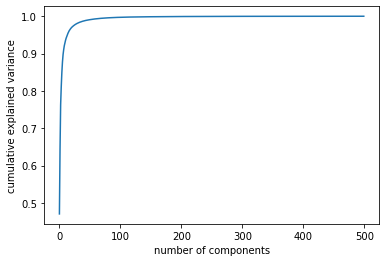

In [11]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [12]:
pca = PCA(n_components=2)
pca.fit(df)

PCA(n_components=2)

In [13]:
X_transformed = pca.transform(df)
print(X_transformed.shape)

(41266, 2)


In [14]:
X_retransformed = pca.inverse_transform(X_transformed)
print(X_retransformed.shape)

(41266, 500)


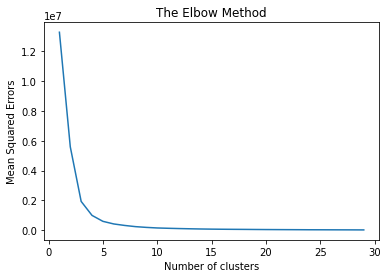

<Figure size 720x720 with 0 Axes>

In [15]:
wcss=[]
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.figure(figsize=(10,10))
plt.show()


In [16]:
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(X_transformed)
y_kmeans = kmeans.fit_predict(X_transformed)
labels = k_means.labels_

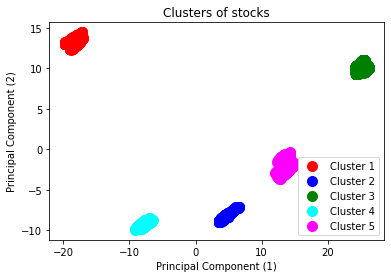

In [17]:
plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_transformed[y_kmeans == 3, 0], X_transformed[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_transformed[y_kmeans == 4, 0], X_transformed[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of stocks')
plt.xlabel('Principal Component (1)')
plt.ylabel('Principal Component (2)')
plt.legend()
plt.show()

In [18]:
df_comp = pd.DataFrame(pca.components_,columns=data.columns)
df_comp.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039258,-0.041064,-0.062908,-0.009788,-0.035866,-0.054668,0.050356,-0.035396,-0.044060,-0.014671,...,-0.049413,0.057001,-0.054623,-0.050608,0.047199,-0.057897,-0.061392,-0.062477,0.002538,-0.051698
1,-0.064284,0.033861,0.001861,-0.032453,0.043511,-0.029519,0.016178,0.058286,-0.052667,0.012376,...,-0.058941,0.030277,0.013643,-0.040769,-0.052795,0.010238,0.031466,-0.020406,-0.081229,-0.059501


<AxesSubplot:>

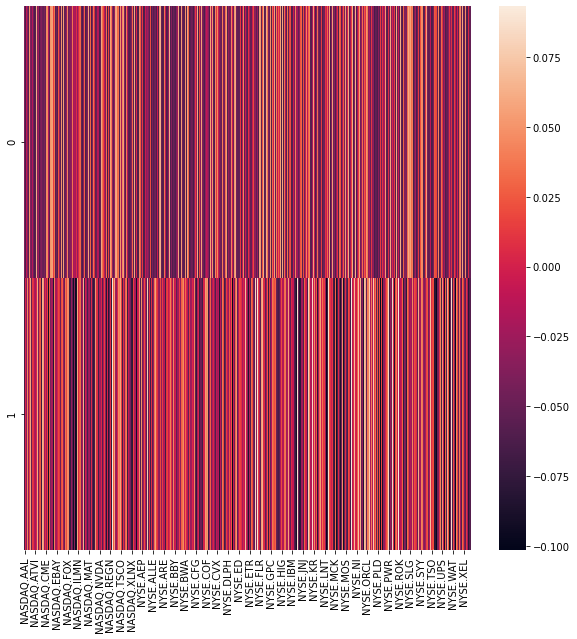

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df_comp)

In [22]:
data['labels']=labels
data['labels'].unique().tolist()

[1, 3, 4, 0, 2]

In [23]:
for i in data['labels'].unique().tolist():
    count = data[data['labels'] == i].shape[0]
    print('\n For lablel {} the number of similar stock performances is : {} '.format(i,count))


 For lablel 1 the number of similar stock performances is : 5874 

 For lablel 3 the number of similar stock performances is : 8622 

 For lablel 4 the number of similar stock performances is : 11155 

 For lablel 0 the number of similar stock performances is : 5877 

 For lablel 2 the number of similar stock performances is : 9738 


In [24]:
from  sklearn.cluster import SpectralClustering
xn = SpectralClustering(n_clusters = 5, affinity = 'nearest_neighbors')
xn.fit(X_transformed)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [25]:
xn.fit_predict(X_transformed)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([2, 2, 2, ..., 0, 0, 0])

In [26]:
y_labels = xn.labels_
len(y_labels),np.unique(y_labels)

(41266, array([0, 1, 2, 3, 4]))

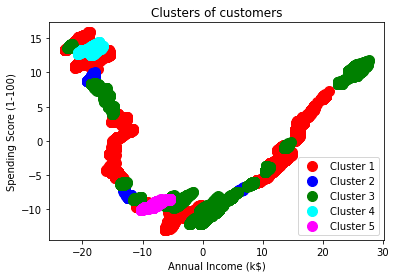

In [27]:
X = X_transformed
plt.scatter(X[y_labels == 0, 0], X[y_labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_labels == 1, 0], X[y_labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_labels == 2, 0], X[y_labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_labels == 3, 0], X[y_labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_labels == 4, 0], X[y_labels == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
